## Topic Model Diary Chunk Prep

## Resources

In [1]:
# Packages
import pandas as pd
import gensim
import numpy as np
from gensim.utils import simple_preprocess
import spacy
import pickle
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
# Functions for stopwords, bigrams, trigrams, lemmatization, conversion of texts into list of lowercase tokens

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'VERB']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def text_to_words(texts):
    for text in texts:
        yield(gensim.utils.simple_preprocess(str(text), 
                                             deacc=True, # removes accents
                                             min_len=3))   # removes tokens shorter than three characters

In [3]:
# Initialize spacy 'en' model
# python3 -m spacy download en_core_web_md
nlp = spacy.load('en_core_web_md')

In [4]:
# 19th century stopwords
stop_words = pd.read_csv("Jockers_19thCenturyStops.csv")
stop_words = stop_words['word'].values.astype(str).tolist()
len(stop_words)

5631

In [5]:
# Narratives
df = pd.read_csv("20240701_PhD_Data4TopicModel-DiaryChunk.csv") 
df = df.rename(columns={'Unnamed: 0':'docID-AT'}) # Change column name to "docID-AT"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   docID-AT          1023 non-null   int64  
 1   docid             1023 non-null   object 
 2   docyear           1023 non-null   int64  
 3   docmonth          0 non-null      float64
 4   authorName        1023 non-null   object 
 5   docauthorid       1023 non-null   object 
 6   authorLocation    1023 non-null   object 
 7   authorGender      1023 non-null   object 
 8   nationalOrigin    921 non-null    object 
 9   irish             921 non-null    object 
 10  otherUK           921 non-null    object 
 11  relMin            1023 non-null   bool   
 12  catholic          1023 non-null   bool   
 13  otherChristian    1023 non-null   bool   
 14  U                 1023 non-null   bool   
 15  M                 1023 non-null   bool   
 16  S                 1023 non-null   bool   


Code below adapated from https://medium.com/analytics-vidhya/topic-modeling-using-gensim-lda-in-python-48eaa2344920

## Prepare narratives

In [6]:
# Convert values in text to list of strings (objects)
data = df.text.values.tolist()

In [7]:
data_words = list(text_to_words(data))

In [8]:
#data_words[0]

## Bigram (and trigram) models

In [9]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=34)
#trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)

In [10]:
# See results of trigrams function

#trigrams1 = [] # Create list
#for item in data_words: # For each item (i.e., chunk) in data words
    #trigrams1.append([b for b in trigram[item] if b.count('_') == 1]) # add 2-grams to new list
#trigrams1 = list(np.concatenate(trigrams1)) # flatten list
#trigrams1 = list(dict.fromkeys(trigrams1)) # take unique values
#print(sorted(trigrams1)) # print in alphabetical order

#trigrams2 = [] # Create list
#for item in data_words: # For each item (i.e., chunk) in data words
    #trigrams2.append([b for b in trigram[item] if b.count('_') == 2]) # add 2-grams to new list
#trigrams2 = list(np.concatenate(trigrams2)) # flatten list
#trigrams2 = list(dict.fromkeys(trigrams2)) # take unique values
#print(sorted(trigrams2)) # print in alphabetical order

## Stop Words

In [11]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [12]:
# What are the most common words?
counts = Counter(x for sublist in data_words_nostops for x in sublist)
Counter(counts).most_common(1000)

[('day', 1284),
 ('morning', 1168),
 ('came', 1047),
 ('night', 867),
 ('dinner', 781),
 ('evening', 720),
 ('little', 687),
 ('tea', 675),
 ('house', 665),
 ('bed', 617),
 ('time', 522),
 ('early', 504),
 ('saw', 491),
 ('cold', 469),
 ('afternoon', 459),
 ('took', 455),
 ('town', 436),
 ('nice', 431),
 ('breakfast', 407),
 ('going', 397),
 ('called', 387),
 ('today', 381),
 ('work', 380),
 ('port', 380),
 ('weather', 377),
 ('sent', 375),
 ('bay', 364),
 ('hot', 348),
 ('rain', 347),
 ('saturday', 347),
 ('monday', 342),
 ('horses', 329),
 ('walk', 325),
 ('tired', 320),
 ('gave', 318),
 ('late', 313),
 ('pounds', 313),
 ('take', 305),
 ('tuesday', 302),
 ('nearly', 284),
 ('wind', 283),
 ('feel', 279),
 ('thursday', 277),
 ('old', 276),
 ('friday', 272),
 ('wednesday', 267),
 ('felt', 266),
 ('fine', 264),
 ('brought', 263),
 ('quite', 250),
 ('walked', 245),
 ('water', 244),
 ('things', 244),
 ('away', 243),
 ('yalata', 241),
 ('club', 241),
 ('read', 237),
 ('busy', 234),
 ('mail'

In [13]:
len(Counter(counts))

12819

In [14]:
new_items = ['yalata', 
             'mesurier', 
             'gaskell', 
             'streaky', #Streaky Bay
             'higgins', 
             'roberts', 
             'connor', 
             'jones', 
             'melbourne', 
             'blyth', 
             'melville',
             'mccord', 
             'ayres', 
             'penong', 
             'toms', 
             'walters', 
             'hughes', 
             'godlee',
             'green',
             'bishop',
             'reynolds',
             'wemyss',
             'charra',
             'smith',
             'middleton',
             'goolwa',
             'glyde',
             'estrange',
             'thompson',
             'waterhouse',
             'daly',
             'worrier',
             'clode', # mispelled word?
             'strangeways', #Strangeways Terrace
             'gaskells',
             'kerslake',
             'didnot', #did not
             'beadon',
             #'monday',
             #'tuesday',
             #'wednesday',
             #'thursday',
             #'friday',
             #'saturday',
             #'sunday',
             'baker', 
             'bowman',
             #'mother', # not including plural forms so the base forms of the items below 
             #'father', # still exist in the final texts
             #'brother',
             #'sister',
             #'uncle',
             #'aunt',
             #'son',
             #'daughter',
             #'friend',
             #'sir'
             #'letter', 
             'time', 
             'times',
             'day', 
             'days',
             'week',
             'weeks',
             'month',
             'months',
             'year',
             'years',
             'morning',
             'night',
             'evening',
             'afternoon',
             'today',
             'tomorrow',
             'morrow',
             'tonight',
             'yesterday',
             'hour',
             'hours',
             'oclock',
             'clock',
             'noon',
             'midnight',
             'half',
             'hart',
             'colona',
             'andrews',
             'eucla',
             'bagot',
             'dutton',
             'miller',
             'tullock',
             'hudson',
             'spence', 
             'duffield',
             'milne',
             'weir',
             'bakewell',
             'stirling',
             'ellershaw',
             'london', 
             'hardy',
             'gawler',
             'ing', # disjointed word
             'stone',
             #'goyder', # leaving for now because refers to important farming term
             'bishops',
             'highlands',
             'simpson',
             'mccords',
             'sullivan',
             'brisbane',
             'riddock',
             'crawford',
             'townsend',
             'fowlers',
             'agers',
             'franks',
             'cllershaw',
             'arnald',
             'bayer',
             'blackmore',
             'hamp',
             'cucla',
             'harrisons',
             'finniss',
             'wallaroo',
             'hicks',
             'singleton',
             'watson',
             'sonth' #misspelling?,
             'wemy',
             'dicks',
             'dashwood',
             'bengal',
             'boucaut',
             'neales',
             'wharton',
             'davenport',
             'tomkinson',
             'acraman'
            ]

stop_words.extend(new_items)
len(stop_words)

5752

I noticed that winter was dropped as a stopword. Checking the Jockers list, I see that the other seasons are there too. I want to leave seasons as they are potentially associated with key topics. Also, removing here, there and home. Checked the whole list and added quite a few words that seem inappropriate as stopwords for this study.

In [15]:
x = ['winter', 
     'spring', 
     'summer', 
     'autumn',  
     'home', 
     'fairy', 
     'faith', 
     'forest', 
     'brook', 
     'gala', 
     'gay', 
     'hunter', 
     'ivy',
     'jewel',
     'love', # added love in because not a conventional here.
     'maple',
     'pages',
     'page',
     'research',
     'son',
     'star',
     'stormy',
     'sun',
     'sunny',
     'sunshine',
     'temple',
     'together',
     'velvet',
     'blossom']
stop_words = [s for s in stop_words if s not in x]
len(stop_words)

5723

In [16]:
# Put in alphabetical order
stop_words.sort() 

In [17]:
# Re-remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# What are the most common words?
counts = Counter(x for sublist in data_words_nostops for x in sublist)
Counter(counts).most_common(1000)

[('home', 1133),
 ('came', 1047),
 ('dinner', 781),
 ('little', 687),
 ('tea', 675),
 ('house', 665),
 ('bed', 617),
 ('early', 504),
 ('saw', 491),
 ('cold', 469),
 ('took', 455),
 ('town', 436),
 ('nice', 431),
 ('breakfast', 407),
 ('going', 397),
 ('called', 387),
 ('work', 380),
 ('port', 380),
 ('weather', 377),
 ('sent', 375),
 ('bay', 364),
 ('hot', 348),
 ('rain', 347),
 ('saturday', 347),
 ('monday', 342),
 ('horses', 329),
 ('walk', 325),
 ('tired', 320),
 ('gave', 318),
 ('late', 313),
 ('pounds', 313),
 ('take', 305),
 ('tuesday', 302),
 ('nearly', 284),
 ('wind', 283),
 ('feel', 279),
 ('thursday', 277),
 ('old', 276),
 ('friday', 272),
 ('wednesday', 267),
 ('felt', 266),
 ('fine', 264),
 ('brought', 263),
 ('quite', 250),
 ('walked', 245),
 ('water', 244),
 ('things', 244),
 ('away', 243),
 ('club', 241),
 ('read', 237),
 ('busy', 234),
 ('mail', 218),
 ('bread', 211),
 ('letter', 209),
 ('bad', 207),
 ('arrived', 207),
 ('place', 203),
 ('sleep', 200),
 ('mill', 198),


In [18]:
len(Counter(counts))

12714

## Bigrams & Lemmatization

In [19]:
# See results of bigrams function
bigrams = [] # Create list
for item in data_words_nostops: # For each item (i.e., letter) in data words
    bigrams.append([b for b in bigram[item] if b.count('_') == 1]) # add 2-grams to new list
bigrams = list(np.concatenate(bigrams)) # flatten list
bigrams = list(dict.fromkeys(bigrams)) # take unique values
print(sorted(bigrams)) # print in alphabetical order

['bed_early', 'cup_tea', 'house_work', 'north_wind', 'refreshment_room', 'set_bread', 'showers_rain', 'wind_blowing']


The bigrams function was overactive at min=5, threshold=100. I tweeked this and settled on min=34 (to bring into the most frequent word list) and no threshold setting (so that it would default to 10). 

In [20]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Form Trigrams
# data_words_trigrams = make_trigrams(data_words_nostops)

In [21]:
# Do lemmatization keeping only nouns
data_lemmatizedNouns = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#print(data_lemmatizedNouns[:1])

In [22]:
counts = Counter(x for sublist in data_lemmatizedNouns for x in sublist)
len(Counter(counts))

4887

In [23]:
# Do lemmatization keeping only verbs
#data_lemmatizedVerbs = lemmatization(data_words_bigrams, allowed_postags=['VERB'])
#print(data_lemmatizedVerbs[:1])

In [24]:
#counts = Counter(x for sublist in data_lemmatizedVerbs for x in sublist)
#len(Counter(counts))

In [25]:
# Do lemmatization keeping only noun, verb
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'VERB'])
#print(data_lemmatized[:1])

In [26]:
counts = Counter(x for sublist in data_lemmatized for x in sublist)
len(Counter(counts))

6133

## Evaluation

In [27]:
lengths = []

for x in data_lemmatized:
    lengths.append(len(x))

print(max(lengths))
print(min(lengths))
print(sum(lengths)/len(lengths))

90
26
62.15738025415445


In [28]:
# Let's have a look at the shortest text
# What one is it?
min(range(len(lengths)), key=lengths.__getitem__)

548

In [29]:
print(df['text'][548])

and then we put in and made the boat fast took the things ashore and pitched the tent had some dinner on the ground and then went out roo shooting. we saw a few kangaroos but could not get a shot at one . Returned about sundown and found that our native guide who had been out in his canoe looking for swan eggs and been fortunate enough to catch two swans and also two musk ducks he was eating one of the ducks when we got back. 1862 June 7th Saturday Flora had 4 pups no good.


In [30]:
print(data_words_nostops[548])

['boat', 'fast', 'took', 'things', 'ashore', 'pitched', 'tent', 'dinner', 'ground', 'roo', 'shooting', 'saw', 'kangaroos', 'shot', 'returned', 'sundown', 'native', 'guide', 'canoe', 'looking', 'swan', 'eggs', 'fortunate', 'catch', 'swans', 'musk', 'ducks', 'eating', 'ducks', 'saturday', 'pups']


In [31]:
print(data_words_bigrams[548])

['boat', 'fast', 'took', 'things', 'ashore', 'pitched', 'tent', 'dinner', 'ground', 'roo', 'shooting', 'saw', 'kangaroos', 'shot', 'returned', 'sundown', 'native', 'guide', 'canoe', 'looking', 'swan', 'eggs', 'fortunate', 'catch', 'swans', 'musk', 'ducks', 'eating', 'ducks', 'saturday', 'pups']


In [32]:
print(data_lemmatized[548])

['boat', 'take', 'thing', 'pitch', 'tent', 'dinner', 'ground', 'roo', 'shooting', 'see', 'kangaroo', 'shoot', 'return', 'sundown', 'guide', 'canoe', 'look', 'swan', 'egg', 'catch', 'swan', 'musk', 'duck', 'eat', 'duck', 'pup']


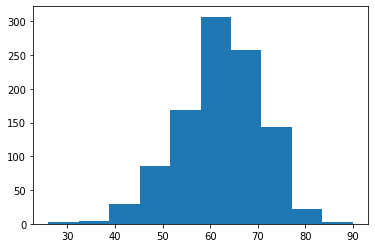

In [33]:
plt.hist(lengths, 10)
plt.show()

In [34]:
lengths = []

for x in data_lemmatizedNouns:
    lengths.append(len(x))

print(max(lengths))
print(min(lengths))
print(sum(lengths)/len(lengths))

65
16
38.520039100684265


In [35]:
# Let's have a look at the shortest text
# What one is it?
min(range(len(lengths)), key=lengths.__getitem__)

446

In [36]:
print(df['text'][446])

rain We left Penong at 2 A.M for Charra the old mare started came at first through her bet being cut with hobbles arrived at Charra about 1.P.M. Mr Higgins here Wangroo homp I feel very tired Mrs Roberts gave us some dinner soon Mr Murray came here about 4t on his way from to Adelaide with a distocated wrist he was roping a colt when the rope caught him around the led and threw him door Langley is driving him he got fresh horses here and Mrs Roberts made him some tea then they went on to Laura Bay he can't get to town till Sunday next Tom slept on front room floor Mr Higgins and Roberts on and Sofar Mr I must to back in my Book this part is now falll until I can get another diary Nov 4th 184


In [37]:
print(data_lemmatizedNouns[446])

['rain', 'mare', 'hobble', 'dinner', 'wrist', 'roping', 'colt', 'rope', 'door', 'langley', 'horse', 'town', 'room', 'floor', 'book', 'diary']


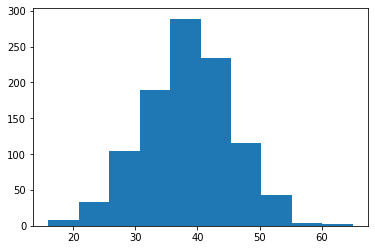

In [38]:
plt.hist(lengths, 10)
plt.show()

The mean length of the chunk is above 50 for the noun-verb set but below 50 for the noun-only set. With the letters collection, I found that that the noun only topic modeling produced more interpretable topics. I will stick with that.

## Saving work

In [39]:
with open("20240701_PhD_AltDiaChkLem-N.txt", "wb") as fp:   #Pickling
    pickle.dump(data_lemmatizedNouns, fp)

#with open("20240608_PhD_LtrChkLem-V.txt", "wb") as fp:   #Pickling
    #pickle.dump(data_lemmatizedVerbs, fp)

#with open("20240608_PhD_LtrChkLem-NV.txt", "wb") as fp:   #Pickling
    pickle.dump(data_lemmatized, fp)